### Capstone Project - Identifying and Recommending Best Restaurants

DESCRIPTION

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Marketing

Read the information given below and also refer to the data dictionary provided separately in an excel file to build your understanding.

Problem Statement
A restaurant consolidator is looking to revamp its B-to-C portal using intelligent automation tech. It is in search of different matrix to identify and recommend restaurants. To make sure an effective model can be achieved it is important to understand the behaviour of the data in hand.

## Import Liabraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
import os
os.chdir('Desktop')

In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates cleaning variable names etc.Based on the findings from the previous questions identify duplicates and remove them.


In [5]:
data.shape

(9551, 19)

In [6]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [7]:
data.isnull().sum().sum()

10

<AxesSubplot:>

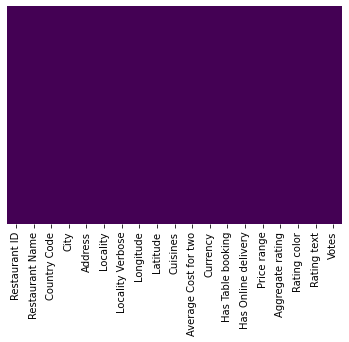

In [8]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [9]:
data1=data.dropna()

In [10]:
data1.shape

(9541, 19)

#### In this dataset we have 10 null values so we drop them as null value count is less

In [11]:
duplicate=data1[data1.duplicated()]

In [12]:
duplicate

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes


#### As we can see we don't have any duplicate values in the dataset so there is no requirement to drop duplicate data.

## Import Country code file and Merge with existing dataset

In [13]:
Country = pd.read_excel('Country_code.xlsx')

In [14]:
Country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### Merge the file

In [15]:
data2 = pd.merge(data1, Country, on = 'Country Code', how = 'left')

In [16]:
data2.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia


#### After merging the files country name column is added as last column

In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9540
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9541 non-null   int64  
 1   Restaurant Name       9541 non-null   object 
 2   Country Code          9541 non-null   int64  
 3   City                  9541 non-null   object 
 4   Address               9541 non-null   object 
 5   Locality              9541 non-null   object 
 6   Locality Verbose      9541 non-null   object 
 7   Longitude             9541 non-null   float64
 8   Latitude              9541 non-null   float64
 9   Cuisines              9541 non-null   object 
 10  Average Cost for two  9541 non-null   int64  
 11  Currency              9541 non-null   object 
 12  Has Table booking     9541 non-null   object 
 13  Has Online delivery   9541 non-null   object 
 14  Price range           9541 non-null   int64  
 15  Aggregate rating     

In [18]:
data2.columns = data2.columns.str.replace(' ','_')
data2.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

In [19]:
data2.isnull().sum().sum()

0

## Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants.

In [20]:
data2['Country'].value_counts()

India             8651
United States      425
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Sri Lanka           20
Qatar               20
Singapore           20
Canada               4
Name: Country, dtype: int64

In [21]:
data2['City'].value_counts()


New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Consort              1
Lincoln              1
Monroe               1
Potrero              1
Lakes Entrance       1
Name: City, Length: 140, dtype: int64

#### If we check above India have high number of restaurants and in India Delhi have the highest number of restaurants

## Explore the geographical distribution of the restaurants, finding out the cities with maximum / minimum number of restaurants

In [24]:
Franchise = data2.groupby(['Restaurant_Name']).agg(Count = ('City','count')).reset_index()
Franchise

,Restaurant_Name,Count
0,12212,1
1,Let's Burrrp,1
2,#45,1
3,#Dilliwaala6,1
4,#InstaFreeze,1
...,...,...
7431,t Lounge by Dilmah,1
7432,tashas,1
7433,wagamama,1
7434,{Niche} - Cafe & Bar,1


In [ ]:
Franchise_Most = Franchise.sort_values(by = 'Count',ascending=False).reset_index(drop=True)
Franchise_Most

## What is the ratio between restaurants that allow table booking vs that do not allow table booking

In [ ]:
## Ratio between restaurants that allow table booking vs. those that do not allow table booking
Booking_table=data2.groupby('Has_Table_booking').Restaurant_ID.count()
Booking_table

In [ ]:
print('Ratio between restaurants that allow table booking vs. those that do not allow table booking:', 
      round((Booking_table.Yes/Booking_table.No),2))

In [ ]:
# Graphical representation of above ration - Pie Chart
plt.title('Booking Availability')
plt.pie(Booking_table,labels=('Table Booking Not Allowed','Table Booking Allowed'),explode=(0.1,0),shadow=True,
        autopct='%1.2f%%')
plt.show()

### We can see in above graph only 12.14% restaurants allow table booking and 87.86 restaurants not allow table booking

## What is the percentage of restaurants providing online delivery

In [ ]:
online_delivery=data2.groupby('Has_Online_delivery').Restaurant_ID.count()
online_delivery

In [ ]:
print('Percentage of restaurants providing online delivery:', round((online_delivery.Yes/online_delivery.sum()),4)*100)

In [ ]:
# Graphical representation via Pie Chart
plt.title('Online Delivery Availability')
plt.pie(online_delivery,labels=('Online Delivery Not Allowed','Online Delivery Allowed'),explode=(0.1,0),shadow=True,
        autopct='%1.2f%%')
plt.show()

### We can see in above graph only 25.69% restaurants provide online delivery and 74.31 restaurants not provide online delivery

## Is there a difference in no. of votes for the restaurants that deliver and the restaurant that don’t

In [ ]:
Votes = data2.groupby(['Has_Online_delivery']).sum('Votes')
Votes

In [ ]:
Votes = Votes.drop(['Restaurant_ID','Country_Code','Longitude','Latitude','Average_Cost_for_two',
                                          'Price_range','Aggregate_rating'], axis = 1)
Votes

In [ ]:
difference_in_votes = Votes.iloc[0]['Votes'] - Votes.iloc[1]['Votes']
print("The difference in number of votes for the restaurants that deliver and the restaurants that do not deliver:= " ,difference_in_votes)

### As we can see above there is difference of 459322 votes between Yes and No for online delivery

## What are the top 10 cuisines served across cities

In [23]:
data2.groupby("Restaurant_Name")["Cuisines"].max().value_counts().head(10)

North Indian                      818
North Indian, Chinese             438
Chinese                           281
Fast Food                         263
North Indian, Mughlai             254
Bakery                            183
North Indian, Mughlai, Chinese    176
Bakery, Desserts                  154
Street Food                       137
Cafe                              132
Name: Cuisines, dtype: int64

### Based on above information we can say that North Indian cuisine is at number 1 and and no2. is chinese

## What is the maximum and minimum no. of cuisines that a restaurant serves? Also, what is the relationship between No. of cuisines served and Ratings

In [29]:
Max_Min_Cuisines = data2.groupby(['Restaurant_Name','Cuisines']).agg( Count = ('Cuisines','count')).reset_index()
Max_Min_Cuisines = Max_Min_Cuisines.sort_values(by = 'Count', ascending = False).reset_index(drop=True)
Max_Min_Cuisines.rename(columns={'Count':'Restaurant_Count'}, inplace=True)
Max_Min_Cuisines

,Restaurant_Name,Cuisines,Restaurant_Count
0,Cafe Coffee Day,Cafe,83
1,Domino's Pizza,"Pizza, Fast Food",78
2,Subway,"American, Fast Food, Salad, Healthy Food",62
3,Green Chick Chop,"Raw Meats, North Indian, Fast Food",47
4,McDonald's,"Fast Food, Burger",44
...,...,...,...
7934,Fusilli Reasons,Italian,1
7935,Funkey Monkey,"Breakfast, Coffee and Tea",1
7936,Funk House Cafe,"Cafe, Italian, Salad",1
7937,Funduz Cafe,Fast Food,1


In [32]:
Max_Min_Cuisines=pd.DataFrame(data2.groupby('Restaurant_Name').Cuisines.count()).reset_index()
Max_Min_Cuisines.sort_values(by = 'Cuisines', ascending = False)

,Restaurant_Name,Cuisines
1098,Cafe Coffee Day,83
2096,Domino's Pizza,79
6097,Subway,63
2713,Green Chick Chop,51
4069,McDonald's,48
...,...,...
2613,Ghar Ki Handi,1
2612,Ghar Ka Swad,1
2610,Ghar Bistro Cafe,1
2609,Ghalib Kabab Corner,1


### Based on above information we can say that Caffee day is highest cuisines served which is 83 and Least cusines serve by restaurants count is 1

In [34]:
data3=data2["Cuisines"].value_counts()
data3

North Indian                                                  936
North Indian, Chinese                                         511
Chinese                                                       354
Fast Food                                                     354
North Indian, Mughlai                                         334
                                                             ... 
Continental, Mexican, North Indian, Chinese                     1
Cafe, Mexican, Italian, Continental                             1
Cafe, Continental, Italian, Street Food                         1
Cafe, Lebanese, Italian                                         1
Cafe, Continental, Desserts, Ice Cream, Italian, Beverages      1
Name: Cuisines, Length: 1825, dtype: int64

In [35]:
data2["No_of_cuisines"]=data1["Cuisines"].str.strip().str.split(',').apply(len)
data2.head(5)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,No_of_cuisines
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498,Indonesia,2.0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873,Indonesia,3.0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605,Indonesia,2.0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395,Indonesia,1.0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243,Indonesia,2.0


In [36]:
data2["No_of_cuisines"]

0       2.0
1       3.0
2       2.0
3       1.0
4       2.0
       ... 
9536    2.0
9537    1.0
9538    3.0
9539    NaN
9540    2.0
Name: No_of_cuisines, Length: 9541, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_cuisines', ylabel='Aggregate_rating'>

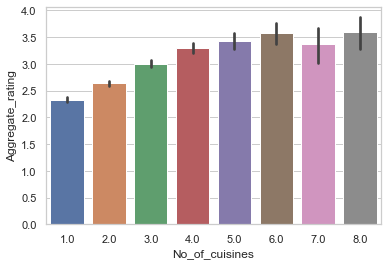

In [38]:
sns.barplot(data2['No_of_cuisines'],data2['Aggregate_rating'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No_of_cuisines', ylabel='Aggregate_rating'>

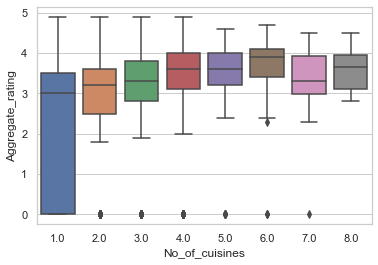

In [47]:
sns.boxplot(data2['No_of_cuisines'],data2['Aggregate_rating'])

### From above chart we can say that restaurant which serve more cuisines they get more ratings

## Discuss the cost vs the other variables

In [40]:
# Currency wise distribution of cost
Currency_dis = pd.DataFrame(data2.groupby('Currency').Average_Cost_for_two.count()).reset_index()
Currency_dis.sort_values(by='Average_Cost_for_two', ascending = False)

,Currency,Average_Cost_for_two
4,Indian Rupees(Rs.),8651
2,Dollar($),473
7,Pounds(å£),80
1,Brazilian Real(R$),60
3,Emirati Diram(AED),60
9,Rand(R),60
6,NewZealand($),40
11,Turkish Lira(TL),34
0,Botswana Pula(P),22
5,Indonesian Rupiah(IDR),21


In [41]:
##  Distribution cost accross the restaurants
Cost_per_restaurants = pd.DataFrame(data2.groupby('Restaurant_Name').Average_Cost_for_two.sum()).reset_index()
Cost_per_restaurants.sort_values(by = 'Average_Cost_for_two', ascending = False)

,Restaurant_Name,Average_Cost_for_two
5889,Skye,800000
5586,Satoo - Hotel Shangri-La,800000
6254,Talaga Sampireun,600000
6162,Sushi Masa,500000
41,3 Wise Monkeys,450000
...,...,...
1911,Deena Chat Bhandar,0
6683,The Latitude - Radisson Blu,0
7087,UrbanCrave,0
5401,Royal Hotel,0


In [42]:
# Restaurants wise distribution of cost - by Currencies
data3=pd.DataFrame(data2.groupby(['Currency','Restaurant_Name']).agg(Count = ('Average_Cost_for_two','sum'))).reset_index()
data3.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
7211,Indonesian Rupiah(IDR),Skye,800000
7210,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
7213,Indonesian Rupiah(IDR),Talaga Sampireun,600000
7212,Indonesian Rupiah(IDR),Sushi Masa,500000
7199,Indonesian Rupiah(IDR),3 Wise Monkeys,450000
...,...,...,...
5682,Indian Rupees(Rs.),Sheroes Hangout,0
1046,Indian Rupees(Rs.),Atmosphere Grill Cafe Sheesha,0
6549,Indian Rupees(Rs.),The Latitude - Radisson Blu,0
427,Dollar($),Senor Iguanas,0


In [43]:
data3.groupby(['Currency'], sort=False)['Count'].max()

Currency
Botswana Pula(P)            6000
Brazilian Real(R$)           460
Dollar($)                    500
Emirati Diram(AED)           750
Indian Rupees(Rs.)         55300
Indonesian Rupiah(IDR)    800000
NewZealand($)                200
Pounds(å£)                   230
Qatari Rial(QR)              550
Rand(R)                     3210
Sri Lankan Rupee(LKR)       4500
Turkish Lira(TL)             400
Name: Count, dtype: int64

In [44]:
# Currency wise highest cost accross restaurants
Max_cost=data3.groupby('Currency')\
  .apply(lambda group: group[group.Count == group.Count.max()])\
  .reset_index(drop=True)
Max_cost.sort_values(by='Count', ascending = False)

,Currency,Restaurant_Name,Count
5,Indonesian Rupiah(IDR),Satoo - Hotel Shangri-La,800000
6,Indonesian Rupiah(IDR),Skye,800000
4,Indian Rupees(Rs.),Domino's Pizza,55300
0,Botswana Pula(P),Spiral - Sofitel Philippine Plaza Manila,6000
11,Sri Lankan Rupee(LKR),The Manhattan Fish Market,4500
10,Rand(R),Restaurant Mosaic @ The Orient,3210
3,Emirati Diram(AED),Applebee's,750
9,Qatari Rial(QR),Vine - The St. Regis,550
2,Dollar($),Restaurant Andre,500
1,Brazilian Real(R$),Coco Bambu,460


### Based on above codes we can say that Satoo and Skye have highest cost across all the restaurants. Satoo restaurant have highest cost in Indonesain currency and Domino's Pizza have highest cost in indian rupees.

## Explain the factors in the data that may have an effect on ratings e.g. No. of cuisines, cost, delivery option etc.

In [49]:
## Aggregate_rating vs count
Rating_count=pd.DataFrame(data2.groupby('Aggregate_rating').agg(Count = ('Restaurant_Name','count'))).reset_index()
Rating_count.sort_values(by='Aggregate_rating', ascending = False)

,Aggregate_rating,Count
32,4.9,61
31,4.8,25
30,4.7,41
29,4.6,78
28,4.5,95
27,4.4,143
26,4.3,174
25,4.2,221
24,4.1,273
23,4.0,266


### From above observation we can say that 61 restaurants have 4.9 ratings and 2148 restaurants have 0 ratings

In [50]:
Country_Rating=pd.DataFrame(data2.groupby(['Country','Aggregate_rating']).agg(Count = 
                                                                               ('Restaurant_Name','count'))).reset_index()
Country_Rating.sort_values(by='Aggregate_rating', ascending = False)

,Country,Aggregate_rating,Count
221,United States,4.9,14
92,New Zealand,4.9,2
139,South Africa,4.9,3
151,Sri Lanka,4.9,1
32,Brazil,4.9,3
...,...,...,...
38,India,1.8,1
200,United States,0.0,3
12,Brazil,0.0,5
180,United Kingdom,0.0,1


In [54]:
# Best rated restaurants by country
Country_wise_top_rating=pd.DataFrame(Country_Rating[Country_Rating.Aggregate_rating >= 4.9]).reset_index()
Country_wise_top_rating.sort_values(by='Count', ascending = False)

,index,Country,Aggregate_rating,Count
1,69,India,4.9,19
11,221,United States,4.9,14
2,79,Indonesia,4.9,4
9,179,UAE,4.9,4
10,199,United Kingdom,4.9,4
0,32,Brazil,4.9,3
4,101,Phillipines,4.9,3
6,139,South Africa,4.9,3
8,163,Turkey,4.9,3
3,92,New Zealand,4.9,2


### India have 19 counts for highest rating post that United states have 14 count for highest rating.

In [55]:
### Rating Distribution
RatingType_count=pd.DataFrame(data2.groupby('Rating_text').agg(Count = ('Restaurant_Name','count'))).reset_index()
RatingType_count

,Rating_text,Count
0,Average,3734
1,Excellent,300
2,Good,2096
3,Not rated,2148
4,Poor,186
5,Very Good,1077


### From above observation we can say that Average rating count is higher which is 3734, Not Rated rating count is 2148 and Good Rating count is 2096

In [59]:
Country_RatingType_count=pd.DataFrame(data2.groupby(['Country','Rating_text']).agg(Count = ('Restaurant_Name','count'))).reset_index()
Country_RatingType_count

,Country,Rating_text,Count
0,Australia,Average,4
1,Australia,Excellent,1
2,Australia,Good,13
3,Australia,Poor,1
4,Australia,Very Good,5
...,...,...,...
61,United States,Excellent,67
62,United States,Good,155
63,United States,Not rated,3
64,United States,Poor,2


In [60]:
Country_wise_ratingType=pd.DataFrame(Country_RatingType_count[Country_RatingType_count.Rating_text =='Excellent']).reset_index()
Country_wise_ratingType.sort_values(by='Count', ascending = False)

,index,Country,Rating_text,Count
2,14,India,Excellent,116
12,61,United States,Excellent,67
11,56,United Kingdom,Excellent,23
10,51,UAE,Excellent,18
1,6,Brazil,Excellent,16
4,23,New Zealand,Excellent,12
5,27,Phillipines,Excellent,12
7,38,South Africa,Excellent,12
9,47,Turkey,Excellent,10
3,20,Indonesia,Excellent,7


### Based on above observation we can say that India have 116 count for excellent rating post that United states have 67 excelllent rating,Austrailia have only 1 excellent rating count

### Visualize the variables using Tableau to help user explore the data and create a better understanding of the restaurants to identify the ‘’star’’ restaurant. Demonstrate  the variables associated with each other and factors to build a dashboard.


Tableau Dashboard Link
https://public.tableau.com/app/profile/dnyaneshwar.gaikwad/viz/RestaurantAnalysis_16737713644730/Dashboard1?publish=yes